Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings 
warnings.filterwarnings('ignore')

STEPS INVOLVED IN APRIORI ALGORITHM:

Compute the support value for each item:
The support is simply the number of transactions in which a specific product (or combination of products) occurs.
Deciding the support threshold
Selection of support threshold depends on domain knowledge and the dataset.
Selecting the one item set based on the support value.
Selecting two item set:
The next step is to do the same analysis, but now using pairs of products instead of individual products.
Repeat the same step for larger sets.
Generate association rule and calculate confidence.
Compute lift ratio.

In [2]:
df =pd.read_csv("Book.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [3]:
score = apriori(df,min_support=0.2,use_colnames=True)
score

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [4]:
model = association_rules(score)
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [5]:
model[model['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Inference : When the Min Support change the number of Rules changed for o.2 there were no rules and for 0.1 there were 5 rules generated.

In [6]:
# Min Support 0.1

score1 = apriori(df,min_support=0.1,use_colnames=True)
score1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [7]:
model1 = association_rules(score1)
model1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
2,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602


In [8]:
model1[model1['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
2,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602


Conclusion/Insights : 
If a customer purchases "ItalCook," they are likely to also purchase "CookBks" (antecedent support: 0.1135, consequent support: 0.431, support: 0.1135, confidence: 1.0, lift: 2.32, leverage: 0.064582, conviction: inf, Zhang's metric: 0.641850).

If a customer purchases both "CookBks" and "RefBks," they are likely to also purchase "ChildBks" (antecedent support: 0.1525, consequent support: 0.423, support: 0.1225, confidence: 0.803279, lift: 1.899004, leverage: 0.057993, conviction: 2.933083, Zhang's metric: 0.558594).

If a customer purchases both "ChildBks" and "RefBks," they are likely to also purchase "CookBks" (antecedent support: 0.1515, consequent support: 0.431, support: 0.1225, confidence: 0.808581, lift: 1.876058, leverage: 0.057204, conviction: 2.972534, Zhang's metric: 0.550345).

If a customer purchases both "ArtBks" and "DoItYBks," they are likely to also purchase "CookBks" (antecedent support: 0.1235, consequent support: 0.431, support: 0.1015, confidence: 0.821862, lift: 1.906873, leverage: 0.048272, conviction: 3.194159, Zhang's metric: 0.542591).

If a customer purchases both "GeogBks" and "DoItYBks," they are likely to also purchase "CookBks" (antecedent support: 0.1325, consequent support: 0.431, support: 0.1085, confidence: 0.818868, lift: 1.899926, leverage: 0.051392, conviction: 3.141354, Zhang's metric: 0.546010).

If a customer purchases both "ArtBks" and "GeogBks," they are likely to also purchase "CookBks" (antecedent support: 0.1275, consequent support: 0.431, support: 0.1035, confidence: 0.811765, lift: 1.883445, leverage: 0.048547, conviction: 3.022812, Zhang's metric: 0.537602).

 The confidence values represent the likelihood of the consequent item being purchased given the antecedent item(s). The lift values indicate the strength of the association between the antecedent and consequent items, with values greater than 1 suggesting a positive correlation.

# VISUALIZATION

Support vs. Confidence Scatter Plot:
This plot visualizes the support and confidence values of the association rules. The support is represented on the x-axis, and the confidence is represented on the y-axis. Each rule is plotted as a point, and the size of the point can represent the lift or any other relevant metric.

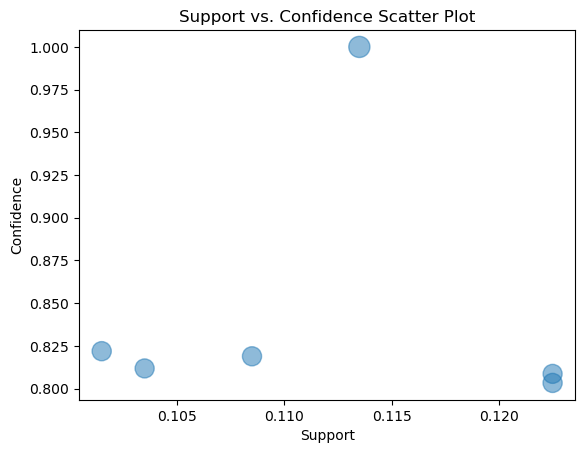

In [9]:
import matplotlib.pyplot as plt

# Plotting support vs. confidence scatter plot
plt.scatter(model1['support'], model1['confidence'], s=model1['lift']*100, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence Scatter Plot')
plt.show()


Network Graph:
A network graph can be useful to visualize the associations between items. Each item is represented as a node, and the associations are represented as edges connecting the nodes. The thickness of the edges can represent the strength of the association.

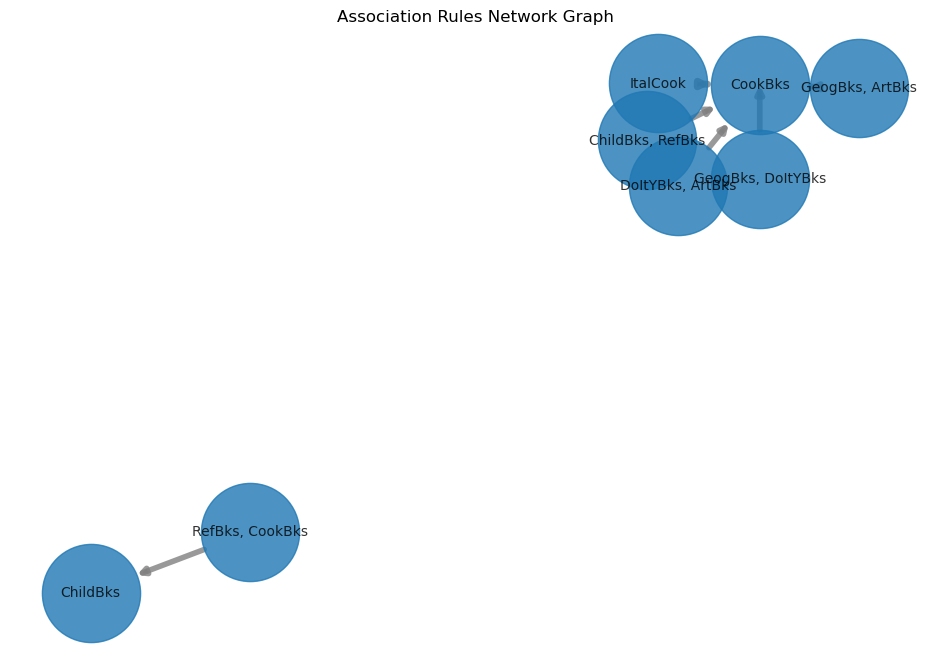

In [10]:
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes and edges to the graph
for idx, row in model1.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['confidence'])

# Plotting the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=5000, edge_color='gray', alpha=0.8, font_size=10, width=[d['weight'] * 5 for (u, v, d) in G.edges(data=True)])
plt.title('Association Rules Network Graph')
plt.axis('off')
plt.show()


Rule Matrix Heatmap:
A heatmap can provide a visual representation of the rule matrix, where each row corresponds to an antecedent-consequent rule, and the cells represent the values of a specific metric (e.g., support, confidence, lift).

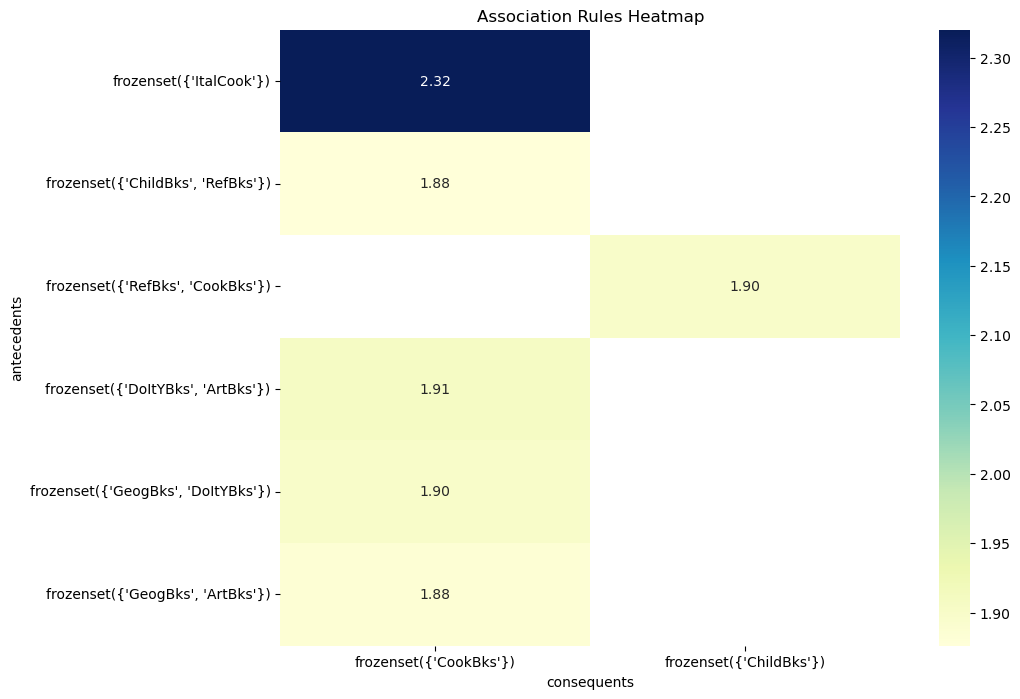

In [11]:

import seaborn as sns

# Creating a rule matrix dataframe
rule_matrix = model1[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rule_matrix = rule_matrix.pivot(index='antecedents', columns='consequents', values='lift')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rule_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Association Rules Heatmap')
plt.show()
